<a href="https://colab.research.google.com/github/chaudharygarima29/Machine_learning_projects/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn import metrics


In [2]:
inputdata=pd.read_csv('/content/housing.csv',sep='\s+',engine='python')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2612017873.py:1: SyntaxWarning: invalid escape sequence '\s'
  inputdata=pd.read_csv('/content/housing.csv',sep='\s+',engine='python')


In [3]:
print(inputdata)

     0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0    0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1    0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2    0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3    0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4    0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   
..       ...    ...    ... ..     ...     ...    ...     ... ..    ...    ...   
500  0.06263    0.0  11.93  0   0.573   6.593   69.1  2.4786  1  273.0   21.0   
501  0.04527    0.0  11.93  0   0.573   6.120   76.7  2.2875  1  273.0   21.0   
502  0.06076    0.0  11.93  0   0.573   6.976   91.0  2.1675  1  273.0   21.0   
503  0.10959    0.0  11.93  0   0.573   6.794   89.3  2.3889  1  273.0   21.0   
504  0.04741    0.0  11.93  0   0.573   6.030   80.8  2.5050  1  273.0   21.0   

     396.90  4.98  24.00  


In [4]:
inputdata.shape

(505, 14)

In [5]:
data1=pd.DataFrame(inputdata)

In [6]:
print(data1)

     0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0    0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1    0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2    0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3    0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4    0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   
..       ...    ...    ... ..     ...     ...    ...     ... ..    ...    ...   
500  0.06263    0.0  11.93  0   0.573   6.593   69.1  2.4786  1  273.0   21.0   
501  0.04527    0.0  11.93  0   0.573   6.120   76.7  2.2875  1  273.0   21.0   
502  0.06076    0.0  11.93  0   0.573   6.976   91.0  2.1675  1  273.0   21.0   
503  0.10959    0.0  11.93  0   0.573   6.794   89.3  2.3889  1  273.0   21.0   
504  0.04741    0.0  11.93  0   0.573   6.030   80.8  2.5050  1  273.0   21.0   

     396.90  4.98  24.00  


In [7]:
data1.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTST','MEDV']

In [8]:
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTST,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [9]:
X=data1.drop(columns='MEDV',axis=1)
Y=data1['MEDV']

In [10]:
print(X)
print(Y)

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
1    0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
2    0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
3    0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
4    0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222.0   
..       ...  ...    ...   ...    ...    ...   ...     ...  ...    ...   
500  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
501  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
502  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
503  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
504  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTST  
0       17.8  396.90   9.14  
1       17.8  392.83   4.03  
2       18.7  394.63 

In [11]:
data1.shape

(505, 14)

In [12]:
data1.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [13]:
data1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTST,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
print(type(data1))

<class 'pandas.core.frame.DataFrame'>


<Axes: >

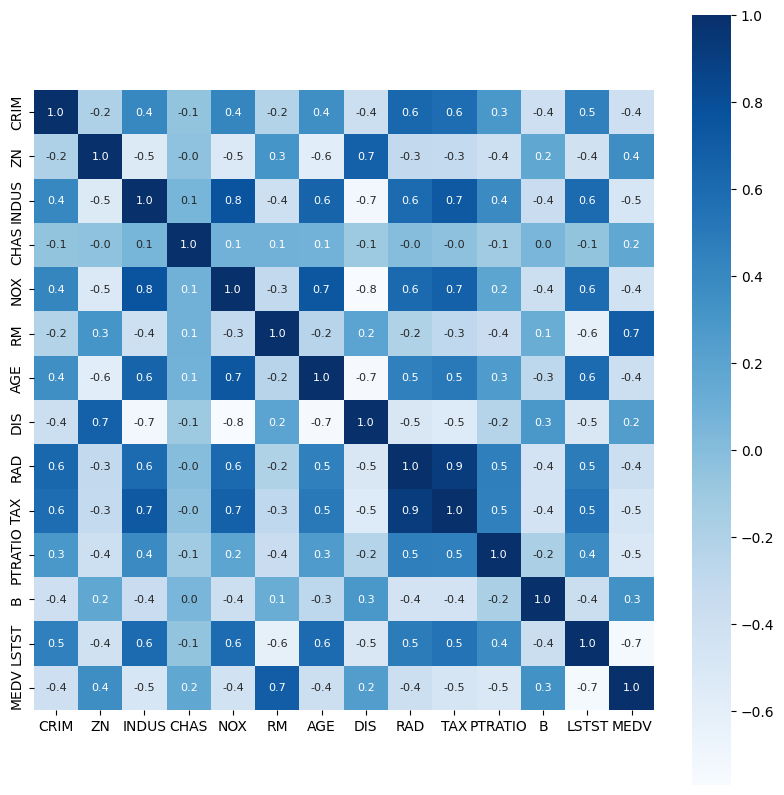

In [15]:
correlation=data1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [17]:
x_train.shape

(404, 13)

In [18]:
y_train.shape

(404,)

In [19]:
X.shape,Y.shape

((505, 13), (505,))

In [20]:
X.shape,x_train.shape,x_test.shape

((505, 13), (404, 13), (101, 13))

In [21]:
# XGBoost Regressor
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [22]:
data_prediction=model.predict(x_train)

In [23]:
print(data_prediction)

[23.10227   24.68357   20.103083  33.423893  16.569891  13.499463
 20.409716  23.20198    9.715054  22.69466   13.804335   5.5895658
 19.629196  49.99837   19.008863  18.898643  32.70051   19.208353
 11.494137  23.165516  24.387253  19.589624  16.4985     6.3094807
 19.298515  23.09601   23.20934   14.596433  31.494028  18.27236
  8.70332   20.900478  11.78385   13.297395  23.903194  19.108358
 49.99948   20.089233   8.39802   21.701643  50.000134  14.907623
 19.379692  18.092976  14.510141  34.923138  18.901226  49.998806
 20.205845  21.198668  31.720648  14.234573  22.893515  22.000689
 18.72992   34.903286  17.892418  15.198828  21.517324  12.704989
 49.99582   15.60046   49.99171   16.508713  50.009563  25.036413
 43.506683  28.41322   26.602707  37.181175  33.41939   28.517729
 36.195625  24.700586  22.688791  12.50715   19.133095  45.997715
 21.999907  50.002598  49.99589   26.991692  23.600674  16.105843
 18.506073  36.10093   31.486027  18.208282  17.107403  28.666792
 28.08827

In [24]:
score1=metrics.r2_score(y_train,data_prediction)

In [25]:
print(score1)

0.9999982067618883


In [26]:
score2=metrics.mean_absolute_error(y_train,data_prediction)

In [27]:
print(score2)

0.008918020984914095


In [28]:
print("R squared error",score1)
print("Mean Squared error",score2)

R squared error 0.9999982067618883
Mean Squared error 0.008918020984914095


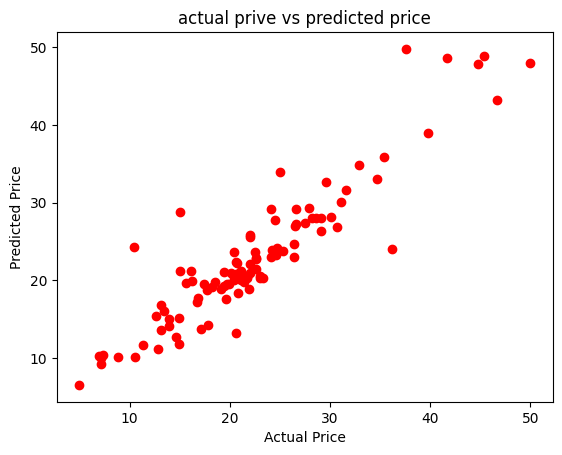

In [37]:
plt.scatter(y_test,data_prediction1,c='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('actual prive vs predicted price')
plt.show()

In [32]:
data_prediction1=model.predict(x_test)
score11=metrics.r2_score(y_test,data_prediction1)
score21=metrics.mean_absolute_error(y_test,data_prediction1)
print(score11)
print(score21)

0.828080841941828
2.3775388660997447
